<a href="https://colab.research.google.com/github/Kamil11-del/DIGITAL-IMAGE-PROCESSING/blob/main/CHA_10_DIGITAL_IMG_PROC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DETECTION OF ISOLATED POINT

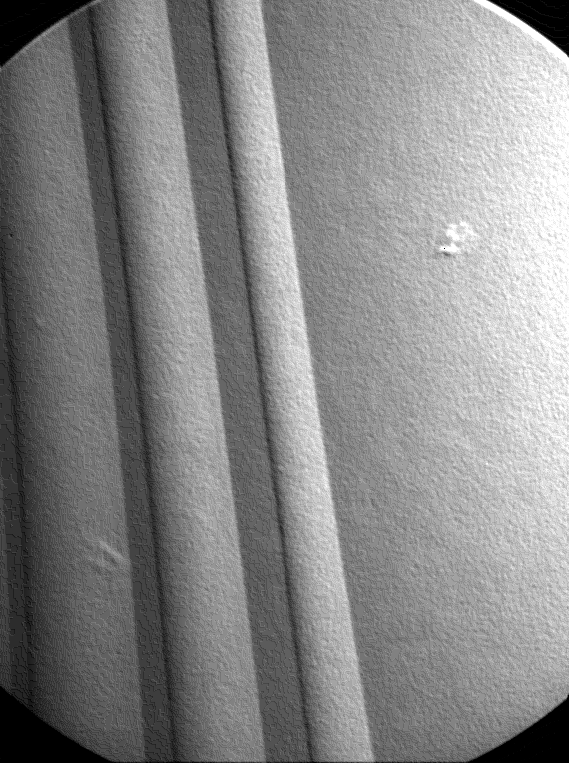

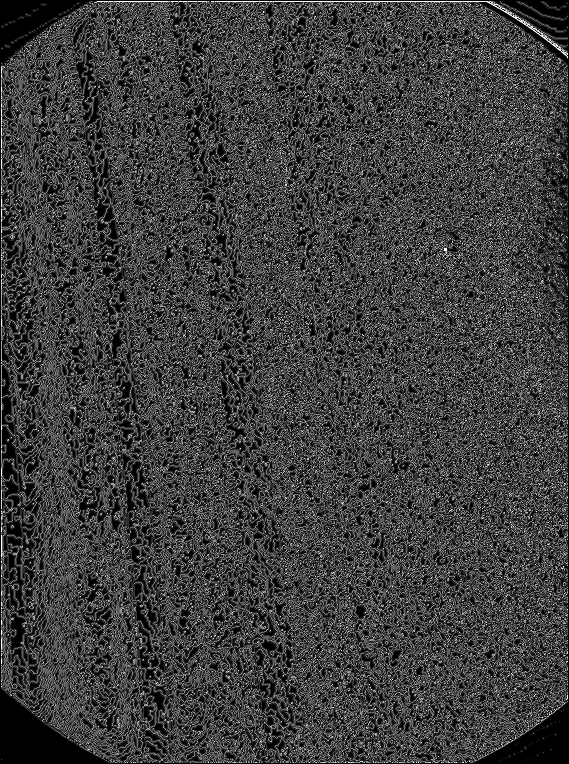

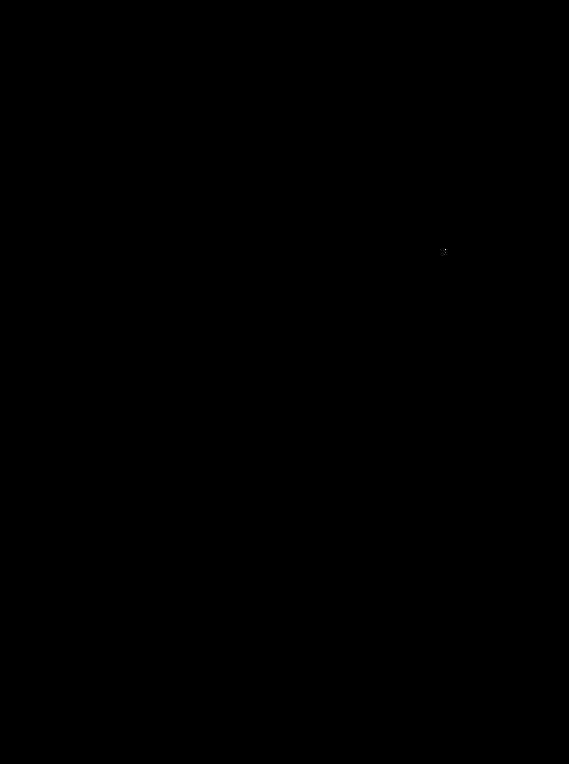

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread('/content/drive/MyDrive/DIP3E_Original_Images_CH10/Fig1004(b)(turbine_blade_black_dot).tif',cv2.IMREAD_GRAYSCALE)

laplacian_kernl = np.array([[1,1,1],
                            [1,-8,1],
                            [1,1,1]])
def apply_laplacian_filtering(image,kernel):
  kernel_radius= kernel.shape[0] //2

  padded_img = np.pad(image, pad_width = kernel_radius, mode='constant',constant_values=0)

  out_image=np.zeros_like(image).astype(np.int32)

  for i in range(kernel_radius , image.shape[0] - kernel_radius):
    for j in range(kernel_radius, image.shape[1] - kernel_radius):
      region = padded_img[i-kernel_radius:i+kernel_radius +1, j-kernel_radius:j+kernel_radius +1]

      out_image[i,j] = np.sum(region * kernel)
  return out_image

lap_img = np.abs(apply_laplacian_filtering(image,laplacian_kernl))
threshold_val =(0.9 * lap_img.max())
binary_img = np.where(np.abs(lap_img) > threshold_val,255,0)

cv2_imshow(image)
cv2_imshow(lap_img)
cv2_imshow(binary_img)


In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

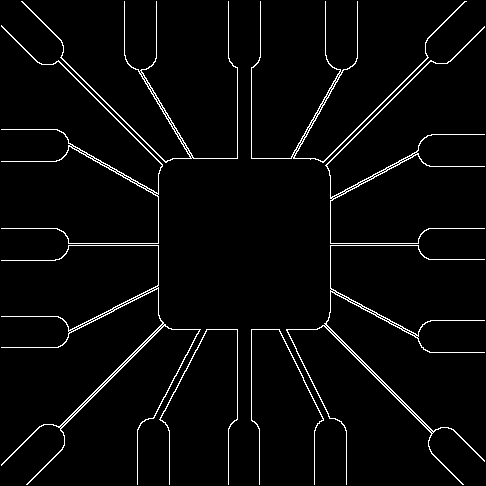

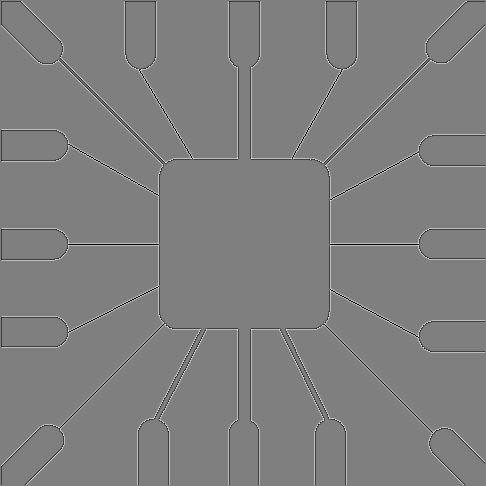

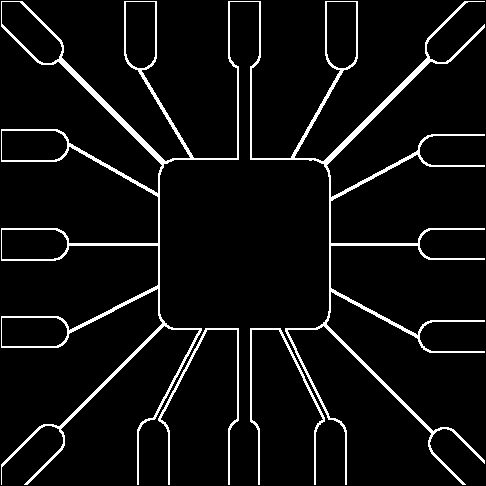

In [ ]:
img = cv2.imread('/content/drive/MyDrive/DIP3E_Original_Images_CH10/Fig1005(a)(wirebond_mask).tif',cv2.IMREAD_ANYCOLOR)

lap_kernel = np.array([[1,1,1],[1,-8,1],[1,1,1]])
lap_img = apply_laplacian_filtering(img,lap_kernel)
# just for visualization purpose we do
lapimg = lap_img - lap_img.min()
# Scale the Laplacian image for visualization
lap_show = ((lapimg / lapimg.max()) * 255).astype(np.uint8)

abs_lap_img = np.abs(lap_img)

cv2_imshow(lap_img)
cv2_imshow(lap_show)
cv2_imshow(abs_lap_img)